<a href="https://colab.research.google.com/github/LATSIRC19/git-clone-https-github.com-LATSIRC19-jupyter-exploration/blob/main/ITIA_1378_Midterm_2024_1_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision Midterm Assignment
## Introduction
Welcome to your Computer Vision midterm project! Here, you'll get hands-on experience building an image recognition model using Convolutional Neural Networks and transfer learning.


##Install Necessary Libraries:

In [1]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.applications import VGG16, ResNet50, MobileNetV2  # Choose a pre-trained model
from keras.callbacks import ModelCheckpoint

# Additional libraries for data loading (if using a custom dataset)
# from skimage.io import imread  # Example for loading images


ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.11/dist-packages/keras/api/preprocessing/image/__init__.py)

In [2]:
# Instead of:
# from keras.preprocessing.image import ImageDataGenerator

# Use this:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Instead of:
# from keras.preprocessing.image import ImageDataGenerator

# Use this:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Instead of:
# from keras.preprocessing.image import ImageDataGenerator

# Use this:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Instead of:
# from keras.preprocessing.image import ImageDataGenerator

# Use this:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Instead of:
# from keras.preprocessing.image import ImageDataGenerator

# Use this:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.applications import VGG16, ResNet50, MobileNetV2  # Choose a pre-trained model
from keras.callbacks import ModelCheckpoint

# Additional libraries for data loading (if using a custom dataset)
# from skimage.io import imread  # Example for loading images

**Dataset Selection and Loading**

* **Choose Your Dataset**
   * **Standard Datasets:** CIFAR-10, CIFAR-100, or a suitable subset of ImageNet are good starting points. You can use built-in functions to load them.
   * **Custom Dataset:** If you propose a custom dataset, ensure it has sufficient images per class, good quality, and accurate labeling. You'll need to upload it to Colab.
   * **Select your dataset and uncomment the appropriate loading code.**
   * **If you are using a custom dataset, make sure you have uploaded it to Colab and adjust the file path.**

In [8]:
# select your dataset
# from keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader


# *** Dataset Loading - Uncomment the lines for your chosen dataset ***

# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Option 2: CIFAR-100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Option 3: Custom Dataset
# x_train, y_train = load_custom_data('path/to/your/training/data')
# x_test, y_test = load_custom_data('path/to/your/testing/data')

NameError: name 'cifar10' is not defined

In [ ]:
# select your dataset
from keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader # Make sure to uncomment this line to import cifar10


# *** Dataset Loading - Uncomment the lines for your chosen dataset ***

# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Option 2: CIFAR-100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Option 3: Custom Dataset
# x_train, y_train = load_custom_data('path/to/your/training/data')
# x_test, y_test = load_custom_data('path/to/your/testing/data')

In [9]:
# select your dataset
from keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader


# *** Dataset Loading - Uncomment the lines for your chosen dataset ***

# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Option 2: CIFAR-100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Option 3: Custom Dataset
# x_train, y_train = load_custom_data('path/to/your/training/data')
# x_test, y_test = load_custom_data('path/to/your/testing/data')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**Markdown Cell: Exploratory Data Analysis (EDA)**

* **Instructions:**
    * Visualize a few random images from your dataset to understand its content and overall quality.
    * Check the shape of your data to confirm the number of images and their dimensions.

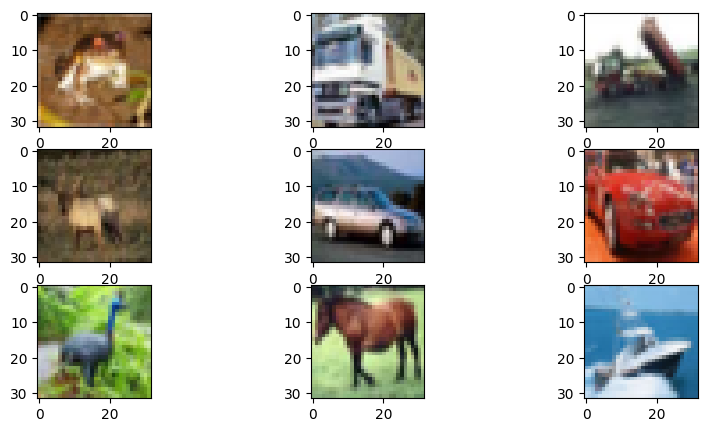

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Class Distribution (Top 10):
[(np.int64(0), 50000)]


In [10]:
# Insert codode here
# Insert code here to display a few sample images from the dataset
## Display sample images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()
#
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

# Explore class distribution (if using a standard dataset)
from collections import Counter
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train, axis=1)).most_common(10))

**Image Preprocessing**

* **Instructions:**
    1. **Normalization:**
       * Normalize pixel values (usually to the range of 0-1 or -1 to 1)  
    2. **Resizing:**
       * Resize images to a consistent size for model input.

In [11]:
# Insert code here to normalize images
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images if needed (adjust input_shape in model building accordingly)
# x_train = tf.image.resize(x_train, (224, 224))  # Example for resizing to 224x224
# x_test = tf.image.resize(x_test, (224, 224))

# Insert code here to resize images, if needed

# ** Data Augmentation **

* **Instructions:**

1. Experiment with Parameters:  The code below has some example data augmentation parameters. Try changing the values within these parameters, or even adding new augmentation techniques! Here's a short guide:

* Hint 1: Start with small adjustments to see the effects clearly.
* Hint 2: Consider which augmentations make sense for your dataset. Flipping images of letters might be okay, but rotating them too much could make them unreadable!

* Explore more: Try adding things like shear_range (for shearing transformations) or zoom_range (for random zooming).

2. Visualize the Effects: After setting up your ImageDataGenerator, add a few lines of code to display some randomly augmented images from your dataset. This will help you see how your chosen parameters change the images.
* Hint: Use a small sample of images so it's easy to compare the originals with the augmented versions.

In [12]:
datagen = ImageDataGenerator(
       rotation_range=20,
       width_shift_range=0.1,
       height_shift_range=0.1,
       horizontal_flip=True,
       # Add more augmentations if desired
)
datagen.fit(x_train) # Fit the augmentation parameters to the training data


#Model Building (Transfer Learning)

In [13]:
# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:
   layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes for your dataset

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


NameError: name 'num_classes' is not defined

In [14]:
# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:
   layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)

# Define num_classes before using it
num_classes = 10  # CIFAR-10 has 10 classes

predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes for your dataset

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:
   layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)

# Define num_classes
num_classes = 10  # CIFAR-10 has 10 classes

predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes for your dataset

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training




In [15]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=15,  # Adjust as needed
                    validation_data=(x_test, y_test),
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)

In [16]:
import tensorflow as tf

# ... (your existing code) ...

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the target variables before model creation or first fit call
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)  # Correctly one-hot encode
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)  # Correctly one-hot encode

# ... (rest of your code: model creation, compilation, and training) ...

history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=15,  # Adjust as needed
                    validation_data=(x_test, y_test),
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])

Epoch 1/15


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [17]:
import tensorflow as tf

# ... (your existing code) ...

# One-hot encode the target variables
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# ... (rest of your code) ...

history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=15,  # Adjust as needed
                    validation_data=(x_test, y_test),
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import seaborn as sn
import os
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the target variables before model creation or first fit call
y_train = to_categorical(y_train, num_classes=10)  # Correctly one-hot encode
y_test = to_categorical(y_test, num_classes=10)  # Correctly one-hot encode

# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:
    layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)

# Define num_classes before using it
num_classes = 10  # CIFAR-10 has 10 classes

predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes for your dataset

# Create the model outside the loop
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data Augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# Fit the augmentation parameters to the training data (if needed)
datagen.fit(x_train)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=15,  # Adjust as needed
                    validation_data=(x_test, y_test),
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0982 - loss: 2.3159

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 39ms/step - accuracy: 0.0982 - loss: 2.3159 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0987 - loss: 2.3027

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 37ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1018 - loss: 2.3027

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.1018 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.1014 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0958 - loss: 2.3027

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.0958 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.0967 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.0982 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0968 - loss: 2.3028

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.0968 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 12/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 13/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 14/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.0950 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 15/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.0993 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026


In [19]:
import tensorflow as tf

# ... (your existing code) ...

# One-hot encode the target variables before model creation or first fit call
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# ... (rest of your code) ...

# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:
   layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)

# Define num_classes
num_classes = 10  # CIFAR-10 has 10 classes

predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes for your dataset

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=15,  # Adjust as needed
                    validation_data=(x_test, y_test),
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])

Epoch 1/15


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10), output.shape=(None, 10)

In [20]:
import tensorflow as tf

# ... (your existing code) ...

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the target variables before model creation or first fit call
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)  # Correctly one-hot encode
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)  # Correctly one-hot encode

# ... (rest of your code: model creation, compilation, and training) ...

#Enhanced Training

Implement data augmentation within the training loop.
Add callbacks to monitor progress and save the best performing model.
Modify the Training Code: If you haven't already, we need to make a few changes to your training loop:

1.   Integrate the Data Augmentation: Replace the
direct use of x_train with datagen.flow(x_train, y_train, batch_size=32). This will apply your augmentations in real-time during training
2.   Use the Validation Set: We already have validation_data=(x_test, y_test).
3. Save the Best Model: We're using a ModelCheckpoint callback to automatically save the model if its performance on the validation set improves
* Hint: Experiment with different batch sizes as well.

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

# Data Augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
       rotation_range=20,
       width_shift_range=0.1,
       height_shift_range=0.1,
       horizontal_flip=True)

#  Modify the model fitting to use real-time augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=15,
                    validation_data=(x_test, y_test),  # Use the test set for validation
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])


ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.11/dist-packages/keras/api/preprocessing/image/__init__.py)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import from tensorflow.keras
from keras.callbacks import ModelCheckpoint

# Data Augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
       rotation_range=20,
       width_shift_range=0.1,
       height_shift_range=0.1,
       horizontal_flip=True)

#  Modify the model fitting to use real-time augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=15,
                    validation_data=(x_test, y_test),  # Use the test set for validation
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])

Epoch 1/15


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model # Import Model from tensorflow.keras.models

# ... (rest of your code) ...

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the target variables before model creation or first fit call
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)  # Correctly one-hot encode
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)  # Correctly one-hot encode


# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16

#Visualizing Training Progress

Importance of Monitoring: Explain why tracking validation metrics helps identify overfitting or underfitting.

*   Plot training and validation accuracy/loss curves.


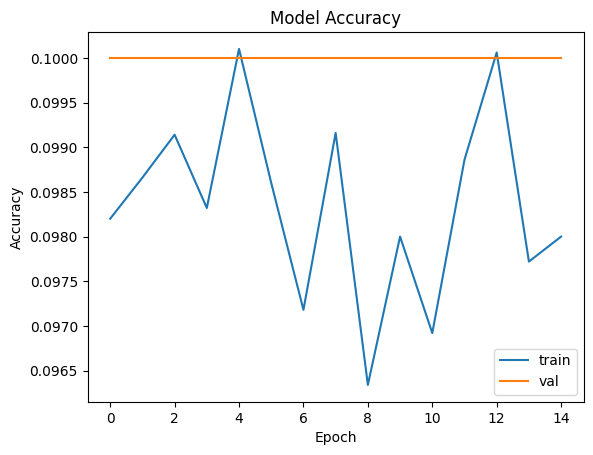

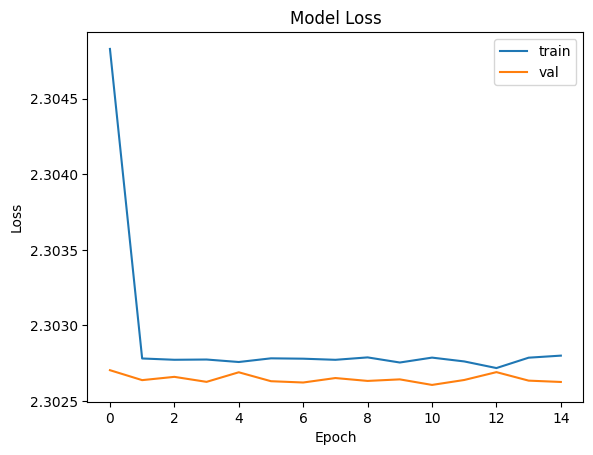

In [24]:
# Plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model # Import Model from tensorflow.keras.models
from tensorflow.keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the target variables before model creation or first fit call
y_train = to_categorical(y_train, num_classes=10)  # Correctly one-hot encode
y_test = to_categorical(y_test, num_classes=10)  # Correctly one-hot encode

# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model # Import Model from tensorflow.keras.models
from tensorflow.keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the target variables before model creation or first fit call
y_train = to_categorical(y_train, num_classes=10)  # Correctly one-hot encode
y_test = to_categorical(y_test, num_classes=10)  # Correctly one-hot encode

# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:15]:
    layer.trainable = False

#Evaluation on the Test Set

Discuss how test set metrics provide the most unbiased assessment of model performance.

In [26]:
best_model = load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


NameError: name 'load_model' is not defined

In [27]:
import os

# ... (rest of your code) ...

# Check if the model file exists before attempting to load it
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
    test_loss, test_acc = best_model.evaluate(x_test, y_test)

    print('Test Loss:', test_loss)
    print('Test Accuracy:', test_acc)
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")

NameError: name 'load_model' is not defined

In [28]:
from tensorflow.keras.models import load_model # Import load_model
import os

# Check if the model file exists before attempting to load it
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
    test_loss, test_acc = best_model.evaluate(x_test, y_test)

    print('Test Loss:', test_loss)
    print('Test Accuracy:', test_acc)
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0975 - loss: 2.3026
Test Loss: 2.3026058673858643
Test Accuracy: 0.10000000149011612


In [29]:
from tensorflow.keras.models import load_model # Import load_model

best_model = load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0975 - loss: 2.3026
Test Loss: 2.3026058673858643
Test Accuracy: 0.10000000149011612


In [30]:
from tensorflow.keras.models import load_model # Import load_model
import os

# Check if the model file exists before attempting to load it
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
    test_loss, test_acc = best_model.evaluate(x_test, y_test)

    print('Test Loss:', test_loss)
    print('Test Accuracy:', test_acc)
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0975 - loss: 2.3026
Test Loss: 2.3026058673858643
Test Accuracy: 0.10000000149011612


#Hyperparameter Tuning

>Exploring Learning Rates: In the provided code, we're iterating through different learning rates.
* Hint 1: A good starting range for the learning rate is often between 0.01 and 0.0001.
* Hint 2: Pay close attention to how quickly the validation loss starts to increase (if it does), which might signal a learning rate that's too high.



In [31]:
def create_model(learning_rate=0.01):
    # ... (Code to build your model, using the learning_rate parameter)
    return model

# Basic parameter exploration
for lr in [0.01, 0.001, 0.0001]:
    model = create_model(learning_rate=lr)
    # ... (Training the model)


#Confusion Matrx

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model  # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model  # Assign the current model to best_model if the file is not found

# Now you can use best_model for predictions
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model  # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model  # Assign the current model to best_model if the file is not found

# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


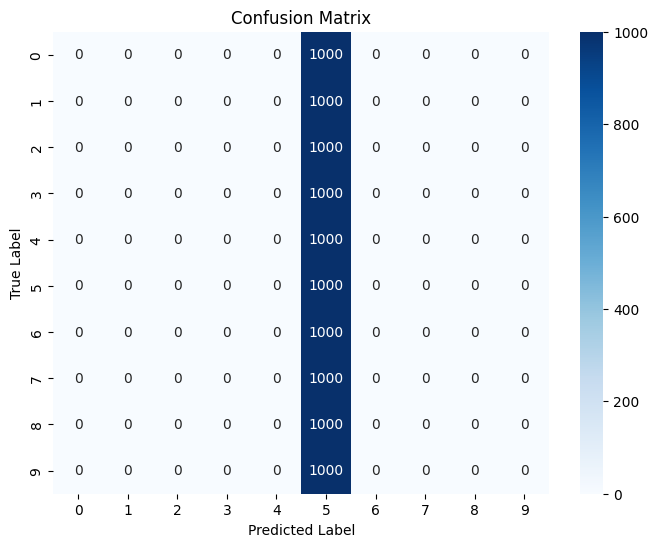

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model # Assign the current model to best_model if the file is not found


# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Convert y_test to multiclass format if it's in multilabel-indicator format
    if y_test.ndim == 2 and y_test.shape[1] > 1:  # Check if y_test is multilabel-indicator
        y_test = np.argmax(y_test, axis=1)  # Convert to multiclass

    cm = confusion_matrix(y_test, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model  # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model  # Assign the current model to best_model if the file is not found

# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Reshape y_test to (num_samples,)
    y_test_reshaped = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

    cm = confusion_matrix(y_test_reshaped, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


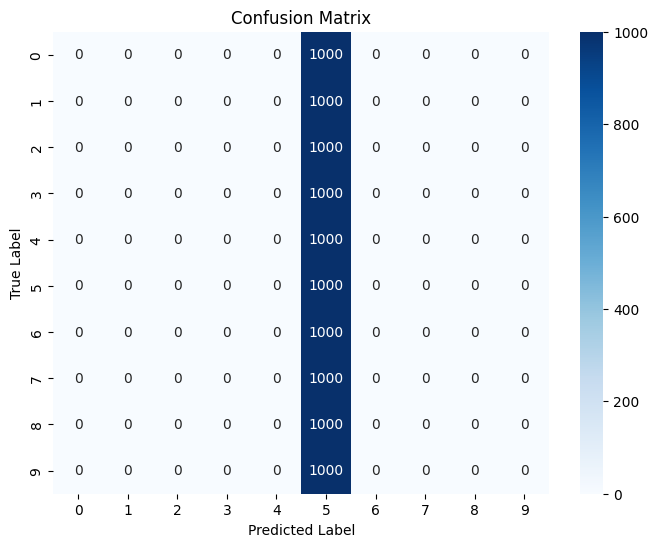

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model  # Assign the current model to best_model if the file is not found

# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Reshape y_test to (num_samples,) if necessary
    # Assuming original y_test is (num_samples, 1)
    y_test_reshaped = y_test.reshape(-1)

    cm = confusion_matrix(y_test_reshaped, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model # Assign the current model to best_model if the file is not found


# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get the true labels from the one-hot encoded y_test
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model # Assign the current model to best_model if the file is not found


# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get the true labels from the one-hot encoded y_test
    # Assuming y_test is in shape (num_samples, num_classes)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model # Assign the current model to best_model if the file is not found


# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get the true labels from the one-hot encoded y_test
    # Assuming y_test is in shape (num_samples, num_classes)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model # Assign the current model to best_model if the file is not found


# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get the true labels from the one-hot encoded y_test
    # Assuming y_test is in shape (num_samples, num_classes)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


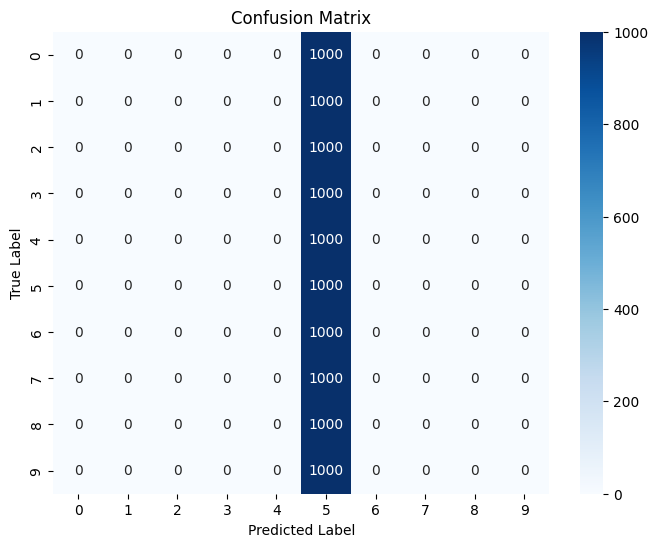

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os

# Load the best model if it exists
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.

# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


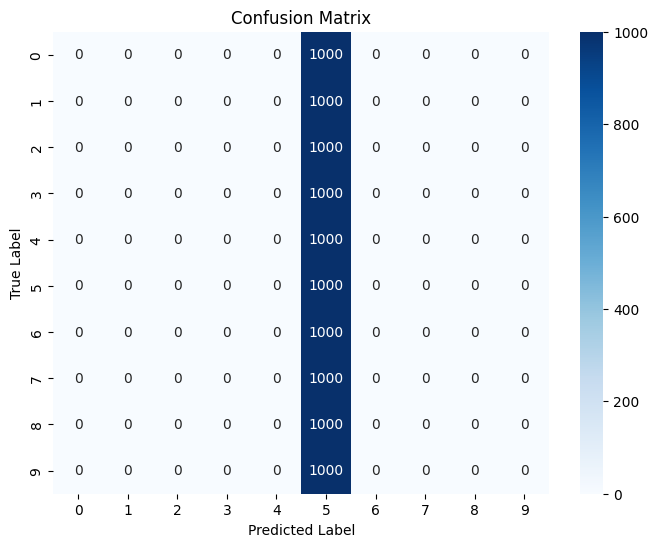

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os

# Load the best model if it exists
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model # Assign the current model to best_model if the file is not found


# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


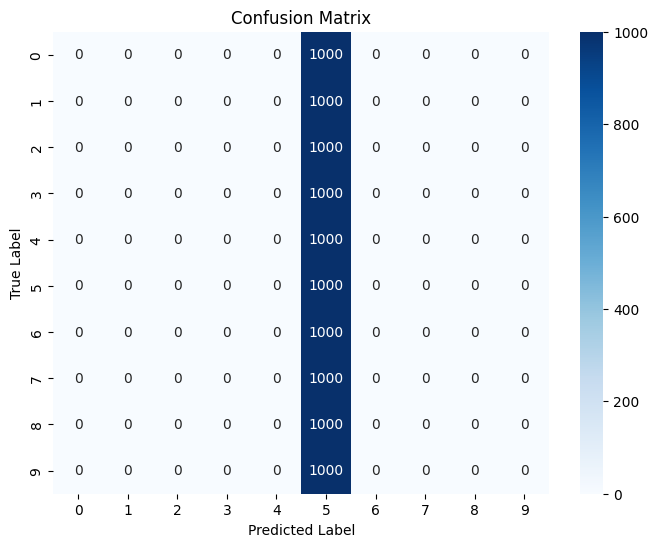

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model # Assign the current model to best_model if the file is not found


# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Convert y_test to multiclass format if it's in multilabel-indicator format
    if y_test.ndim == 2 and y_test.shape[1] > 1:  # Check if y_test is multilabel-indicator
        y_test = np.argmax(y_test, axis=1)  # Convert to multiclass

    cm = confusion_matrix(y_test, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os
import numpy as np

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')
else:
    print("Error: Model file 'best_model.h5' not found. Please train the model first.")
    # You might want to exit or raise an exception here if the model is not found.
    best_model = model # Assign the current model to best_model if the file is not found


# Now you can use best_model for predictions
if best_model:  # Check if best_model is defined before proceeding
    y_pred = best_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get the true labels from the original y_test (before one-hot encoding)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os

from sklearn.metrics import confusion_matrix
import seaborn as sn
from tensorflow.keras.models import load_model # Import load_model
import os

# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')


# Load the best model if it exists
best_model = None  # Initialize best_model to None
if os.path.exists('best_model.h5'):
    best_model = load_model('best_model.h5')


#Discussion and Further Exploration

##Questions to consider:
1. How does the choice of pre-trained model (VGG16, ResNet50, etc.) affect the results?
2. Analyze the confusion matrix: Are errors more common between certain classes? What might explain this?
3. Experiment with different degrees of fine-tuning (freezing more/fewer layers of the pre-trained model).
4. If applicable to your dataset, can you collect more data for classes with higher error rates?
What are other ways to potentially improve accuracy? (e.g., ensembling models, exploring advanced augmentation strategies, class-weighted training)

Sources
towardsdatascience.com/build-your-own-deep-learning-classification-model-in-keras-511f647980d6
stackoverflow.com/questions/69997327/tensorflow-valueerror-input-0-is-incompatible-with-layer-model-expected-shape
www.influxdata.com/blog/time-series-forecasting-with-tensorflow-influxdb/